# Names:

# Introduction

We are analyzing the Speed Dating Experiment dataset from Kaggle

[[[[[What is the data science problem you are trying to solve? Why does the problem matter? What could the results of your predictive model be used for? Why would we want to be able to predict the thing you’re trying to predict? Then describe the dataset that you will use to tackle this problem.]]]]]

The dataset involves a number of demographic and preference questions, which include asking participants to rate things like how important they think certain attributes are in a partner, how important they believe other people think they are, how they think they measure up, etc. 

In [387]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import square, sqrt
from pandas import DataFrame

%matplotlib inline

In [388]:
# read in data and display all features for first 5 records
df = pd.read_csv('./data/speed_dating_data.csv', engine='python')
pd.set_option('display.max_columns', None)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

# Data preprocessing

## Dropping features
To start, we went through and examined all 195 features in the dataset, using domain knowledge and examining how many missing values were in each to determine which features to keep or remove.

The questions asked of the participants are split into three time categories: Time1 being before/during the event (including demographic info, rating their partners, etc.), Time2 being the day after the event (only preference questions), and Time3 being 3-4 weeks after (including questions like whether they have actually gone on a date yet, etc.). 

By our domain knowledge, we decided to drop the features that come from Time2 and Time3, since they are all repeat questions from Time1, and the participants' attitudes _after_ they make their decisions likely won't help predict what went into their decision during the event. The Time2 and Time3 features likely provide good insight into how a person's feelings towards the process change, but likely have little impact on their decisions prior.

The one feature from Time2 we decided to keep is satis_2, which indicates how satisfied they were with the people they met.

In [389]:
data = df.loc[:, :'satis_2']
data.head()
data.shape

(8378, 120)

Next, several questions were asked only to certain waves of participants - this means that many features are missing tons of values. For instance, the questions asked halfway through meeting all dates (rate the importance of certain attributes and your rating of your own attributes) were not asked of waves 1-5, 12-14, or 21 - more than half of participants.

To examine, we can count the percentage of missing values for each feature.

In [390]:
nans = data.isna().sum() / data.shape[0]
nans[nans > 0.10]

positin1    0.220339
shar_o      0.128432
undergra    0.413464
mn_sat      0.626044
tuition     0.572332
zipcode     0.126999
income      0.489258
expnum      0.785152
attr4_1     0.225471
sinc4_1     0.225471
intel4_1    0.225471
fun4_1      0.225471
amb4_1      0.225471
shar4_1     0.228097
attr5_1     0.414419
sinc5_1     0.414419
intel5_1    0.414419
fun5_1      0.414419
amb5_1      0.414419
shar        0.127357
match_es    0.140010
attr1_s     0.511101
sinc1_s     0.511101
intel1_s    0.511101
fun1_s      0.511101
amb1_s      0.511101
shar1_s     0.511101
attr3_s     0.522559
sinc3_s     0.522559
intel3_s    0.522559
fun3_s      0.522559
amb3_s      0.522559
satis_2     0.109215
dtype: float64

Examining the results, many features are missing upwards of 40% of their values. It doesn't make sense to try to try to drop rows or fill in these values since so many are missing, as this would greatly skew results. Also, most of them are very similar to earlier questions (eg. how you perceive yourself vs. how you think others perceive you), so dropping them likely won't have much impact. 

As an initial filtering, we remove those features with more than 40% of their values missing.

In [391]:
print("Features dropped due to too many missing values:")
print(list((data.loc[:, (df.isna().sum() / data.shape[0]) >= 0.40]).columns ))
data = data.loc[:, (df.isna().sum() / data.shape[0]) < 0.40]

Features dropped due to too many missing values:
['undergra', 'mn_sat', 'tuition', 'income', 'expnum', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']


In [392]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0


Next, we can drop certain features that won't have an impact on whether two people match. A list of dropped features and their justifications are below:

- id, idg, partner: these ID numbers have no effect on the outcome
- wave, round, position, positin1: these are factors about the process of the event (eg. station number) that will not affect whether two people match
- dec (their decision), dec_o (decision of their partner): we're trying to determine whether these two people match, which could be directly found from dec and dec_o (if both are 1, match=1); using these would be cheating and remove all valuable insights.
- zipcode: the numeric value of a zipcode is arbitrary and thus would mess up a machine learning model

Note: we keep iid and pid for now so we can lookup people in order to do feature engineering.

In [393]:
drop_list = ['id', 'idg', 'partner', 'wave', 'round', 'position', 'positin1', 'dec', 'dec_o', 'zipcode']
data = data.drop(drop_list, axis=1)
data.head()

,iid,gender,condtn,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2
0,1,0,1,4,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0
1,1,0,1,3,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0
2,1,0,1,10,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0
3,1,0,1,5,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0
4,1,0,1,7,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0


In [394]:
data.shape

(8378, 89)

# TODO
drop zipcode, OHE for some

## Data exploration
After dropping many features either due to too many missing values or irrelevancy to the thing we're trying to predict (whether two people match), we are ready to begin exploring the features that remain.

### Demographic features
To start, we can analyze trends in the demographic features of participants.

Since each person is listed multiple times (according to the number of people they met), we first need to get a dataframe where each participant is listed only once, to get a true representation of the demographic features present.

In [395]:
people = data.groupby('iid').first()
print("Number of participants: ", people.shape[0])

Number of participants:  551


In [396]:
genders = people.groupby('gender').size()
print("Number of females: ", genders.iloc[0])
print("Number of males: ", genders.iloc[1])

Number of females:  274
Number of males:  277


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF2B2F6278>]],
      dtype=object)

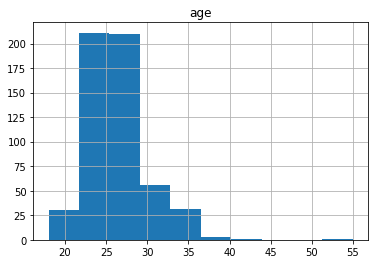

In [397]:
people.hist(column='age')

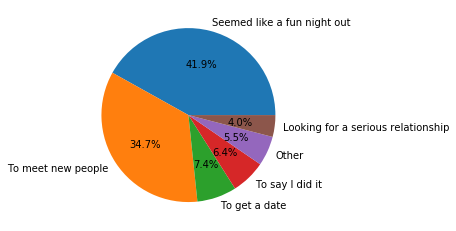

In [398]:
goal_labels = {
    1: 'Seemed like a fun night out', 
    2: 'To meet new people', 
    3: 'To get a date', 
    4: 'Looking for a serious relationship', 
    5: 'To say I did it', 
    6: 'Other'
}

goals = people['goal'].value_counts().index.tolist()
goals = [goal_labels[g] for g in goals]
goal_counts = people['goal'].value_counts().to_list()

plt.pie(goal_counts, labels=goals, autopct='%1.1f%%')
plt.show()

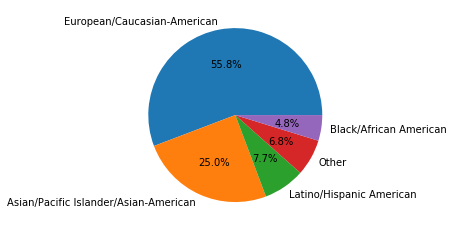

In [399]:
race_labels = {
    1: 'Black/African American', 
    2: 'European/Caucasian-American', 
    3: 'Latino/Hispanic American', 
    4: 'Asian/Pacific Islander/Asian-American', 
    5: 'Native American', 
    6: 'Other'
}

races = people['race'].value_counts().index.tolist()
races = [race_labels[r] for r in races]
race_counts = people['race'].value_counts().tolist()

plt.pie(race_counts, labels=races, autopct='%1.1f%%')
plt.show()

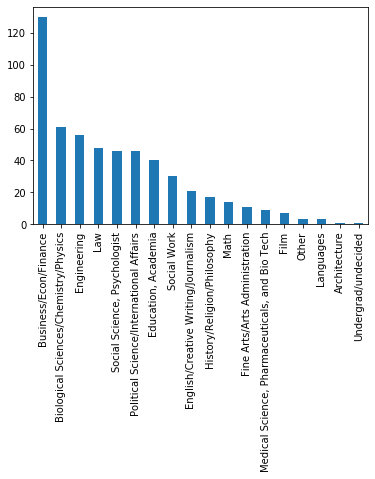

In [400]:
field_codes = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science, Psychologist',
    4: 'Medical Science, Pharmaceuticals, and Bio Tech',
    5: 'Engineering',
    6: 'English/Creative Writing/Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education, Academia',
    10: 'Biological Sciences/Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Science/International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other',
}
fields = people['field_cd'].copy().replace(field_codes)
fields.value_counts().plot(kind='bar')

As we can see, most participants tend to fall somewhere between the ages of 20-30, which makes sense as most of the participants are grad students at Columbia. There are also, however, participants upwards of 30 and some even up to 50.

The gender split is pretty even, with 274 females and 277 males.

The participants are primarily Caucasian and Asian/Pacific-Islander, with these two groups making up 55.8% and 25% of the participants, respectively. 

Business/Econ/Finance is far and away the most popular field of study; after a sharp dropoff, the next most popular fields are natural sciences, engineering, and law.

Interestingly, most participants (76.6%) stated that their goal in participating in the event was either 'It seemed like a fun night out' or 'To meet new people.' Only 11.4% of participants stated their goal was either 'To get a date' or 'Looking for a serious relationship.' Therefore, it seems as though most participants are not extremely serious in their goals for participating; rather, most participated more for casual reasons - to have fun and meet new people.

### Preference/rating features
Todo

#### Importance of shared demographic features

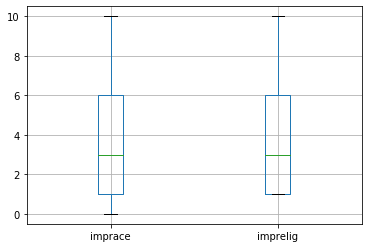

In [401]:
# importance of shared demographic features
people.boxplot(column=['imprace', 'imprelig'])

When asked how important it was that their partner be of the same race and religion on a scale of 1 to 10, the median answer for both was a 3. Additionally, the Q3 value is a 6. This indicates that most participants don't care very much that their partner share these features.

#### Participant interests

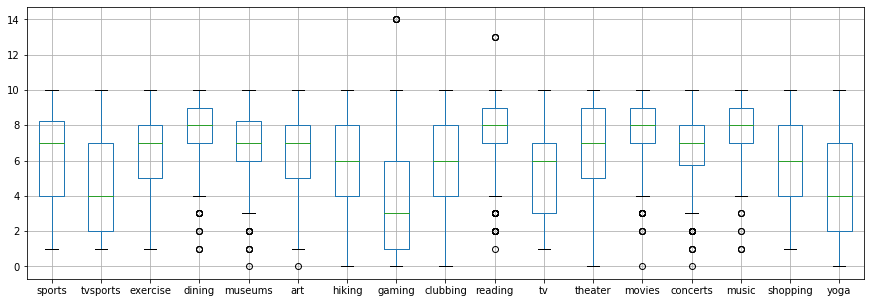

In [402]:
# their own hobbies
plt.figure(figsize=(15, 5))
people.loc[:, 'sports':'yoga'].boxplot()

Looking at how participants rated their interest in these hobbies, we find that these people tend to be most interested in dining, reading, movies, and music.  

There are outliers in many of these features, but this is to be expected - peoples' interests vary widely. However, there are also some points that are known to be errors - since the question was asked on a scale of 1 to 10, any values greater than 10 are noise. We replace any value >10 with 10, indicating the max level of interest in that hobby.

In [403]:
data[data['gaming'] > 10] = 10
data[data['reading'] > 10] = 10

#### What do you most look for in a partner of the opposite sex? What do you think the opposite sex looks for?

Regarding 'what do you think others look for?', attribute4_1 and attribute2_1 ask very similar questions to gauge how a participant thinks other people value these qualities. Since attribute4_1 was not asked to ~25% of the participants, we choose to drop those and keep attribute2_1, which asks "what do you think the opposite sex looks for in a date?"

In [404]:
# drop attr4_1 features
data = data.drop(['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'], axis=1)

In [405]:
# group by gender
gender_groups = people.groupby('gender')
females = gender_groups.get_group(0)
males = gender_groups.get_group(1)

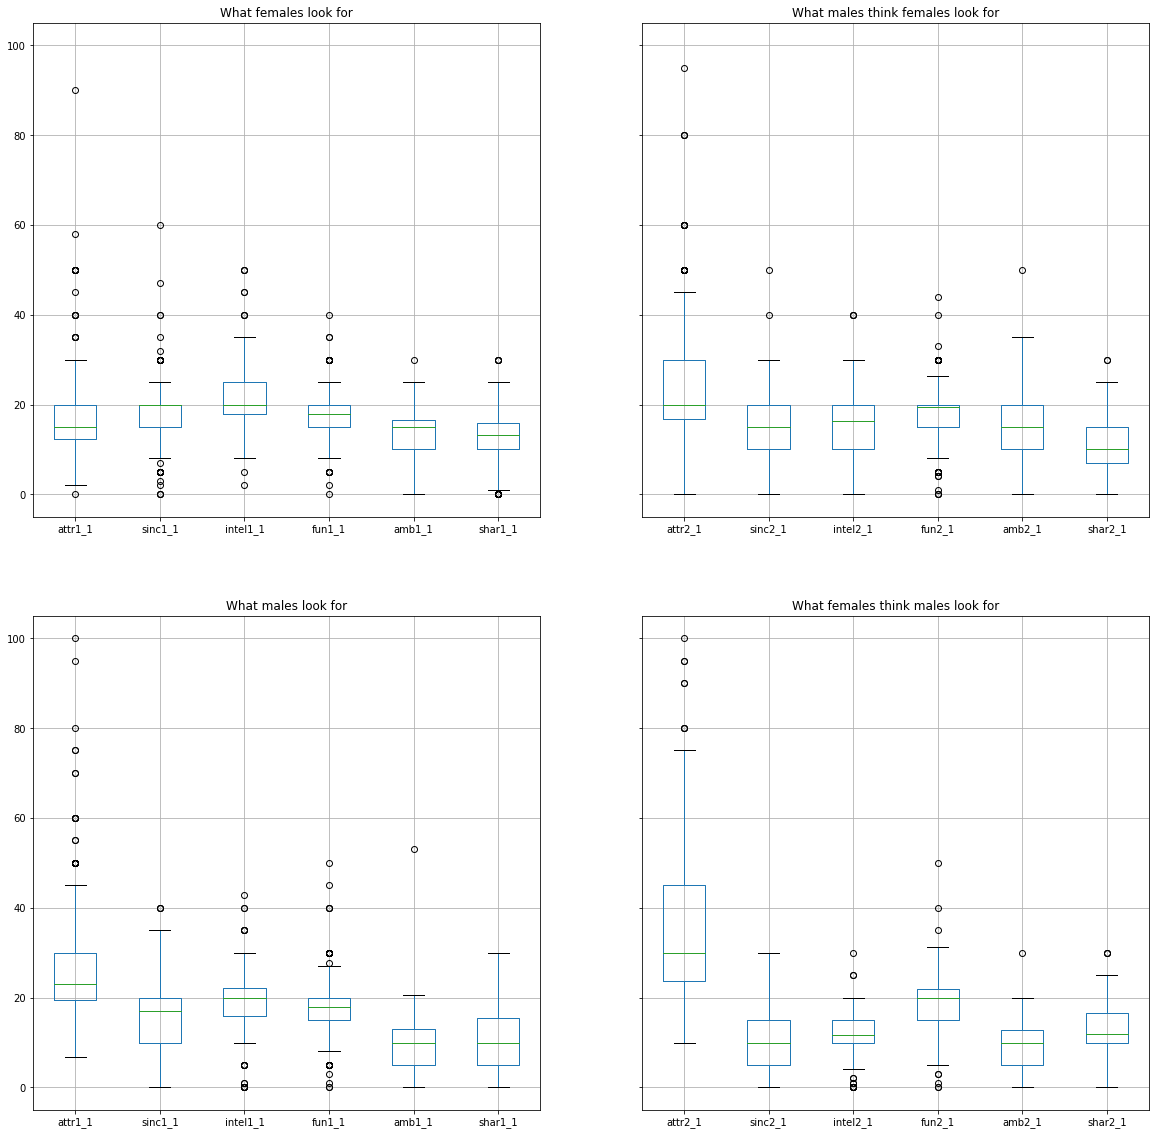

In [406]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20, 20), sharey=True)

# what females look for vs. what males think they look for
ax1.title.set_text("What females look for")
ax2.title.set_text("What males think females look for")
females.loc[:, 'attr1_1':'shar1_1'].boxplot(ax=ax1)
males.loc[:, 'attr2_1':'shar2_1'].boxplot(ax=ax2)

# what males look for vs. what females think they look for
ax3.title.set_text("What males look for")
ax4.title.set_text("What females think males look for")
males.loc[:, 'attr1_1':'shar1_1'].boxplot(ax=ax3)
females.loc[:, 'attr2_1':'shar2_1'].boxplot(ax=ax4)

plt.show()

In [407]:
attributes = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests']
female_actual = females.loc[:, 'attr1_1':'shar1_1'].median().to_numpy()
female_perceived = males.loc[:, 'attr2_1':'shar2_1'].median().to_numpy()
female_diff = female_perceived - female_actual

print("Male perception vs. how females actually value them")
for i in range(len(female_diff)):
    print(attributes[i] + ": " + "%.2f" % (female_diff[i]))

Male perception vs. how females actually value them
Attractive: 4.91
Sincere: -5.00
Intelligent: -3.72
Fun: 1.51
Ambitious: 0.00
Shared interests: -3.21


In [408]:
male_actual = males.loc[:, 'attr1_1':'shar1_1'].median().to_numpy()
male_perceived = females.loc[:, 'attr2_1':'shar2_1'].median().to_numpy()
male_diff = male_perceived - male_actual

print("Female perception vs. how males actually value them")
for i in range(len(male_diff)):
    print(attributes[i] + ": " + "%.2f" % (male_diff[i]))

Female perception vs. how males actually value them
Attractive: 7.00
Sincere: -7.00
Intelligent: -8.37
Fun: 2.00
Ambitious: 0.00
Shared interests: 1.90


From the above plot and outputs, we can see that males tend to value attractivness more than females, but that both sexes tend to overestimate how much the other sex values attractiveness. Both sexes also tend to underestimate sincerity and intelligence.

Females tend to overestimate the importance of attractiveness and underestimate the importance of intelligence more so than males do towards females.

#### How do you think you measure up?

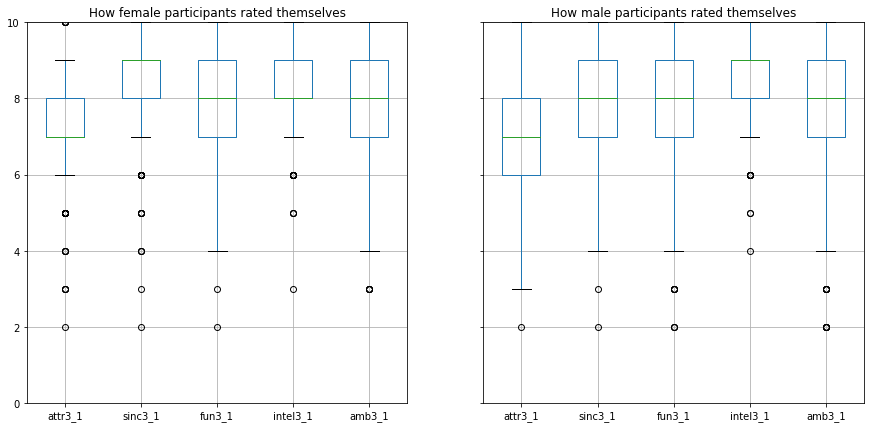

In [409]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7), sharey=True)

plt.ylim(0,10)

females.loc[:, 'attr3_1':'amb3_1'].boxplot(ax=ax1)
ax1.title.set_text("How female participants rated themselves")

males.loc[:, 'attr3_1':'amb3_1'].boxplot(ax=ax2)
ax2.title.set_text("How male participants rated themselves")

When asked the question "how do you think you measure up?" on a scale of 1 to 10, males and females had quite similar responses. Most participants tend to rate themselves in the 7-9 range for most features. It's interesting to note that for both male and female participants, attractiveness had the lowest median rating out of all attributes.

left to do: pf_o_attr, attr_o

## Data cleaning
After dropping certain features and exploring the ones that remain, there is still the issue of cleaning the data so that it can be used for feature engineering and our machine learning models.

In [410]:
data.head()

,iid,gender,condtn,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2
0,1,0,1,4,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0
1,1,0,1,3,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0
2,1,0,1,10,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0
3,1,0,1,5,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0
4,1,0,1,7,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0


In [411]:
data.isna().sum()

iid            0
gender         0
condtn         0
order          0
pid           10
match          0
int_corr     158
samerace       0
age_o        103
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     128
attr_o       210
sinc_o       285
intel_o      304
fun_o        358
amb_o        711
shar_o      1061
like_o       247
prob_o       314
met_o        377
age           95
field         63
field_cd      82
race          63
imprace       79
            ... 
yoga          79
exphappy     101
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr2_1       79
sinc2_1       79
intel2_1      79
fun2_1        79
amb2_1        89
shar2_1       89
attr3_1      105
sinc3_1      105
fun3_1       105
intel3_1     105
amb3_1       105
attr         201
sinc         276
intel        295
fun          349
amb          710
shar        1066
like         238
prob         307
met          3

For certain binary features (condtn, met, and met_o), we transform the values from the scale provided (1 for yes, 2 for no) to a 0/1 scale (1 for yes, 0 for no). Then, we impute met and met_o (whether these two people have met before) with 0 - assuming that they haven't.

In [412]:
# change condtn, met, and met_o from 1(yes)/2(no) to 0(no)/1(yes)
data.loc[data['condtn'] == 2, 'condtn'] = 0
data.loc[data['met'] == 2, 'met'] = 0
data.loc[data['met_o'] == 2, 'met_o'] = 0

# impute met and met_o with 0 (haven't met)
data['met'].fillna(0, inplace=True)
data['met_o'].fillna(0, inplace=True)

For correlation of interests, we impute with the mean.

For races and samerace, we use the mode, since the values are coded (eg. 1: black, 2: white), so using an average or median doesn't make sense since they don't represent actual numerical values.

For ages, we use the median age - almost all participants are grad students in the 20-30 range, so we choose the median rather than the mean to avoid it being skewed by some older participants.

In [413]:
%%capture

# impute int_corr with the mean
data[data['int_corr'] > 1] = 1
data['int_corr'].fillna(data['int_corr'].mean(), inplace=True)

# impute samerace with the mode
data['samerace'].fillna(data['samerace'].mode()[0], inplace=True)

# impute ages with median age
med_age = people['age'].median()
data['age_o'].fillna(med_age, inplace=True)
data['age'].fillna(med_age, inplace=True)

# impute races with mode
mode_race = people['race'].mode()[0]
data['race_o'].fillna(mode_race, inplace=True)
data['race'].fillna(mode_race, inplace=True)

For the features that have participants rate their preferences and interests, we use the mean.

In [414]:
# impute the mean for all of the preference/rating features
data.loc[:, 'pf_o_att':'prob_o'] = data.loc[:, 'pf_o_att':'prob_o'].fillna(people.loc[:, 'pf_o_att':'prob_o'].mean())
data.loc[:, 'imprace':'imprelig'] = data.loc[:, 'imprace':'imprelig'].fillna(people.loc[:, 'imprace':'imprelig'].mean())
data.loc[:, 'sports':'prob'] = data.loc[:, 'sports':'prob'].fillna(people.loc[:, 'sports':'prob'].mean())

We drop the 'from', 'career', and 'field' features, since these are all user-entry text answers, and thus the values could be anything - there is no way to one-hot encode them. We also drop career, since it is essentially the same as the field of study feature. We impute the most common field of study.

In [415]:
# drop 'from', 'career', and 'field' features, since all user-entered there's no way to OHE
data.drop(['from', 'career', 'field'], axis=1, inplace=True)

# drop career_c in favor of field of study
data.drop('career_c', axis=1, inplace=True)

# impute mode for field of study
data['field_cd'].fillna(data['field_cd'].mode()[0], inplace=True)

Participants were also asked to select an option that represents their goal, how often they go on dates, and how often they go out. Since, like race, these features are coded, using a mean or median doesn't make sense since they don't hold intrinsic numeric value - therefore, we use the mode.

In [416]:
# impute goal, date, go_out with mode
data['goal'].fillna(people['goal'].mode()[0], inplace=True)
data['date'].fillna(people['date'].mode()[0], inplace=True)
data['go_out'].fillna(people['go_out'].mode()[0], inplace=True)

Finally, for the expected number of matches and overall satisfaction with the event, we use the mode.

In [417]:
# impute mean for expected number of matches and satisfaction
data['match_es'].fillna(people['match_es'].mean(), inplace=True)
data['satis_2'].fillna(people['satis_2'].mean(), inplace=True)

We can now check to see that all NaN values have been filled in (except for pid, which will be handled in feature engineering before eventually being dropped).

In [418]:
data.columns[data.isna().any()]

Index(['pid'], dtype='object')

## Feature engineering

After preprocessing our data, we are ready to start feature engineering - combining and modifying features to create better predictors of whether two people match.

In [419]:
data.head()

,iid,gender,condtn,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2
0,1,0,1,4,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,0.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.000000,0.0,4.0,6.0
1,1,0,1,3,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,0.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.000000,1.0,4.0,6.0
2,1,0,1,10,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,5.156364,1.0,4.0,6.0
3,1,0,1,5,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,0.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.000000,0.0,4.0,6.0
4,1,0,1,7,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,0.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.000000,0.0,4.0,6.0


Looking at the features that remain, there are many modifications we can make to create better predictors.

First, we drop both race columns (race of this person & race of partner). It's not somebody's race alone that predicts whether they will match with someone else, but rather a factor of the two people's races together - namely, whether or not they are of the same race.

In [420]:
data.drop(['race', 'race_o'], axis=1, inplace=True)

Next, we choose to drop both the age of this person and the age of their partner in favor of age difference. Similar to race, we want a feature that combines the features of these two people, rather than focusing on each one individually.

In [421]:
# do age difference
data['age_diff'] = (data['age'] - data['age_o']).abs()
data.drop(['age', 'age_o'], axis=1, inplace=True)

Next, we combine met and met_o into one feature, since it doesn't seem necessary to have two features telling whether they've met before or not

In [422]:
# combine met and met_o
data['met_both'] = data['met'] + data['met_o']
data.drop(['met', 'met_o'], axis=1, inplace=True)

Next, we drop the features 'date' and 'go_out', which ask participants how often they go on dates and how often they go out. These are dropped because they seem pretty in line with this person's goal and interests.

We also drop this person's ratings for the various hobbies, since we already have a feature 'int_corr' that computes the correlation between this person's ratings and the other person's. One person's interests likely aren't a great predictor of a match - it's more dependent on how the two people's interests line up with each other.

Finally, we drop all the attr2_1 features, which ask participants to rate what they think the opposite sex looks for in a date. While this is insightful information, one's guesses on how the other sex thinks likely has no impact on whether two specific people will match.

In [423]:
# drop
data.drop(['date', 'go_out'], axis=1, inplace=True)
data.drop(data.loc[:, 'sports':'yoga'], axis=1, inplace=True)
data.drop(data.loc[:, 'attr2_1':'shar2_1'], axis=1, inplace=True)

Next, we decided to create a confidence score for each person. They were all asked to rate themselves on the 6 attributes and also asked to state how many matches they think they'd get. These seem important in determining whether two people will match (if someone thinks they have a high rating and a large number of matches, each individual match is probably more likely); however, having 7 different features for it seems excessive. Therefore, we take the mean of these to create one 'confidence' score for each person.

In [424]:
# create confidence score
data['conf'] = (data.loc[:, 'attr3_1':'amb3_1'].sum(axis=1) + data['match_es']) / 6
data.drop('match_es', axis=1, inplace=True)
data.drop(data.loc[:, 'attr3_1':'amb3_1'], axis=1, inplace=True)

Both this person and their partner were asked to rate how important 6 features were & rate their partner 1-10 on these same features. In both directions, we combine the importance with the rating to create a composite score. Ie., if person A thinks intelligence is super important and rates person B a 1/10, this should have a very low score; rating something of low importance means what they rate their partner matters less - the score should be close to the middle. 

Therefore, we use the method of `composite` = (`rating of partner out of 10` - 5) * `importance of that feature`

This means that a low rating for an attribute will result in a negative score, but how heavily that score gets weighted depends on how much their partner values it.

In [425]:
# combine pf_o_attr with att_o
data['prating_att'] = data['pf_o_att'] * (data['attr_o'] - 5)
data['prating_sinc'] = data['pf_o_sin'] * (data['sinc_o'] - 5)
data['prating_intel'] = data['pf_o_int'] * (data['intel_o'] - 5)
data['prating_fun'] = data['pf_o_fun'] * (data['fun_o'] - 5)
data['prating_amb'] = data['pf_o_amb'] * (data['amb_o'] - 5)
data['prating_shar'] = data['pf_o_sha'] * (data['shar_o'] - 5)

# combine attr1 with attr
data['rating_att'] = data['attr1_1'] * (data['attr'] - 5)
data['rating_sinc'] = data['sinc1_1'] * (data['sinc'] - 5)
data['rating_intel'] = data['intel1_1'] * (data['intel'] - 5)
data['rating_fun'] = data['fun1_1'] * (data['fun'] - 5)
data['rating_amb'] = data['amb1_1'] * (data['amb'] - 5)
data['rating_shar'] = data['shar1_1'] * (data['shar'] - 5)

data.drop(data.loc[:, 'attr1_1':'shar'], axis=1, inplace=True)
data.drop(data.loc[:, 'pf_o_att':'shar_o'], axis=1, inplace=True)

We also decided to combine the features `imprace` and `samerace`. This reflects both how important it is that they be of the same race with whether or not they actually are, rather than keeping these separate. 

To get this composite score, we store -1 * imprace if they are not of the same race, and just imprace if they are of the same race.

In [426]:
# combine imprace and samerace
data.loc[data['samerace'] == 0, 'samerace'] = -1
data['imprace'] = data['samerace'] * data['imprace']
data.drop('samerace', axis=1, inplace=True)

Finally, a number of composite features were created by looking up the partner by their pid and taking some scores from their records. 

First, we combine the overall satisfaction levels for both partners. We do this in a similar way that F-measure is calculated from precision and recall, dividing the product of these values by their sum. This combines the two, but prioritizes the one that is lower (since a low satisfaction rate for either partner is a bad sign).

Second, we check both people's fields of study and create a new feature for whether they have the same field of study or not. Similar to race, it's probably important that two people share such a feature, rather than looking at each one individually.

Finally, we do the same thing for goal (what their goal with the event was), for a similar reason.

In [427]:
data['satis_partner'] = 0
data['same_field'] = 0
data['same_goal'] = 0

for index, row in data.iterrows():
    pid = row['pid']
    partner_row = data.loc[data['iid'] == pid]
    
    if len(partner_row) < 1:
        continue
        
    partner_satis = partner_row.iloc[0]['satis_2']
    this_satis = row['satis_2']
    row['satis_overall'] = (partner_satis * this_satis) / (partner_satis + this_satis)
    
    partner_field = partner_row.iloc[0]['field_cd']
    row['same_field'] = 1 if partner_field == row['field_cd'] else 0
        
    partner_goal = partner_row.iloc[0]['goal']
    row['same_goal'] = 1 if partner_goal == row['goal'] else 0
    
    data.iloc[index] = row
    
data.drop(['satis_2', 'field_cd', 'goal'], axis=1, inplace=True)

Finally, we drop the remaining id's from the dataframe, since their numeric values are arbitrary and won't help predict if two people match.

In [428]:
data.drop(['iid', 'pid'], axis=1, inplace=True)

Now, we are left with 30 features with which to predict if two people mtch.

In [429]:
print(data.shape)
data.head()

(8378, 30)


,gender,condtn,order,match,int_corr,like_o,prob_o,imprace,imprelig,exphappy,like,prob,age_diff,met_both,conf,prating_att,prating_sinc,prating_intel,prating_fun,prating_amb,prating_shar,rating_att,rating_sinc,rating_intel,rating_fun,rating_amb,rating_shar,satis_partner,same_field,same_goal
0,0.0,1.0,4.0,0.0,0.14,7.0,4.0,-2.0,4.0,3.0,7.0,6.000000,6.0,0.0,6.833333,35.0,60.0,60.0,60.0,0.0,5.0,15.0,80.0,40.0,30.0,15.0,0.0,0.0,0.0,0.0
1,0.0,1.0,3.0,0.0,0.54,8.0,4.0,-2.0,4.0,3.0,7.0,5.000000,1.0,1.0,6.833333,120.0,0.0,0.0,80.0,0.0,0.0,30.0,60.0,40.0,45.0,0.0,15.0,0.0,1.0,0.0
2,0.0,1.0,10.0,1.0,0.16,10.0,10.0,2.0,4.0,3.0,7.0,5.156364,1.0,2.0,6.833333,95.0,90.0,95.0,90.0,70.0,60.0,0.0,60.0,80.0,45.0,0.0,30.0,0.0,1.0,1.0
3,0.0,1.0,5.0,1.0,0.61,7.0,7.0,-2.0,4.0,3.0,7.0,6.000000,2.0,0.0,6.833333,60.0,15.0,60.0,120.0,20.0,15.0,30.0,20.0,60.0,30.0,15.0,45.0,0.0,1.0,1.0
4,0.0,1.0,7.0,1.0,0.21,8.0,6.0,-2.0,4.0,3.0,6.0,6.000000,3.0,0.0,6.833333,90.0,20.0,80.0,10.0,40.0,40.0,0.0,20.0,40.0,30.0,15.0,15.0,0.0,1.0,0.0


# Data analysis

In [430]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

matches = data['match']
features = data.drop(['match'], axis=1)

std = StandardScaler()
pca = PCA()

In [431]:
# decision trees
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

dt_clf = DecisionTreeClassifier()


param_grid = {
    'pca__n_components': list(range(5, 29, 4)),
    'dt_clf__max_depth': [10, 15, 20],
    'dt_clf__min_samples_leaf': [5, 10, 15, 20],
}

pipeline = Pipeline([
    ('std', std),
    ('pca', pca),
    ('dt_clf', dt_clf)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
preds = cross_val_predict(grid_search, features, matches, cv=5)

confusion = confusion_matrix(matches, preds)
report = classification_report(matches, preds)

print(confusion)
print(report)

[[6284  603]
 [ 891  600]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      6887
         1.0       0.50      0.40      0.45      1491

    accuracy                           0.82      8378
   macro avg       0.69      0.66      0.67      8378
weighted avg       0.81      0.82      0.81      8378



In [432]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

param_grid = {
    'pca__n_components': list(range(5, 29, 4)),
    'knn_clf__n_neighbors': [3, 5, 7, 9]
}

pipeline = Pipeline([
    ('std', std),
    ('pca', pca),
    ('knn_clf', knn_clf)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
preds = cross_val_predict(grid_search, features, matches, cv=5)

confusion = confusion_matrix(matches, preds)
report = classification_report(matches, preds)

print(confusion)
print(report)

[[6431  456]
 [ 924  567]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      6887
         1.0       0.55      0.38      0.45      1491

    accuracy                           0.84      8378
   macro avg       0.71      0.66      0.68      8378
weighted avg       0.82      0.84      0.82      8378



In [433]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

param_grid = {
    'pca__n_components': list(range(5, 29, 4)),
}

pipeline = Pipeline([
    ('std', std),
    ('pca', pca),
    ('nb_clf', nb_clf)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
preds = cross_val_predict(grid_search, features, matches, cv=5)

confusion = confusion_matrix(matches, preds)
report = classification_report(matches, preds)

print(confusion)
print(report)

[[6608  279]
 [1094  397]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      6887
         1.0       0.59      0.27      0.37      1491

    accuracy                           0.84      8378
   macro avg       0.72      0.61      0.64      8378
weighted avg       0.81      0.84      0.81      8378



In [434]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

param_grid = {
    'pca__n_components': list(range(5, 29, 4)),
    'ada_clf__n_estimators': [50, 100, 150]
}

pipeline = Pipeline([
    ('std', std),
    ('pca', pca),
    ('ada_clf', ada_clf)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
preds = cross_val_predict(grid_search, features, matches, cv=5)

confusion = confusion_matrix(matches, preds)
report = classification_report(matches, preds)

print(confusion)
print(report)

[[6459  428]
 [ 858  633]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      6887
         1.0       0.60      0.42      0.50      1491

    accuracy                           0.85      8378
   macro avg       0.74      0.68      0.70      8378
weighted avg       0.83      0.85      0.84      8378



In [435]:
# SVM
from sklearn.svm import SVC

svc = SVC()

pipeline = Pipeline([
    ('std', std),
    ('pca', pca),
    ('svc', svc),
])

param_grid = {
    'pca__n_components': list(range(5, 29, 4)),
    'svc__kernel': ['linear', 'rbf', 'poly'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
preds = cross_val_predict(grid_search, features, matches, cv=5)

confusion = confusion_matrix(matches, preds)
report = classification_report(matches, preds)

print(confusion)
print(report)

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change f

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-d

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

[[6677  210]
 [ 995  496]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      6887
         1.0       0.70      0.33      0.45      1491

    accuracy                           0.86      8378
   macro avg       0.79      0.65      0.68      8378
weighted avg       0.84      0.86      0.83      8378



In [436]:
# neural nets
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

pipeline = Pipeline([
    ('std', std),
    ('nn', nn),
])

param_grid = {
    'nn__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'nn__activation': ['logistic', 'tanh', 'relu'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
preds = cross_val_predict(grid_search, features, matches, cv=5)

confusion = confusion_matrix(matches, preds)
report = classification_report(matches, preds)

print(confusion)
print(report)

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochasti

[[6422  465]
 [ 822  669]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6887
         1.0       0.59      0.45      0.51      1491

    accuracy                           0.85      8378
   macro avg       0.74      0.69      0.71      8378
weighted avg       0.83      0.85      0.84      8378



c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
